In [11]:
import ipynb.fs.full.preProcessing as preProcess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import re
import json
import seaborn as sns

2013    0
2014    0
2015    0
2016    0
2017    0
2018    0
2019    0
2020    0
2021    0
2022    0
2023    0
dtype: int64


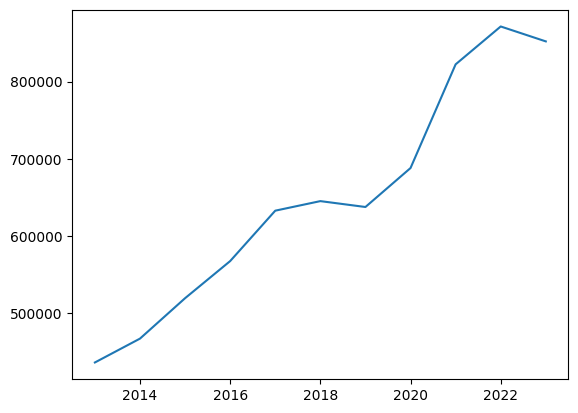

alpine 0.9318328271576923
ararat 0.9258040341394118
ballarat 0.9729746835001815
banyule 0.9614563919601001
basscoast 0.9445221528172084
bawbaw 0.9684997327430944
bayside 0.9360524111007569
benalla 0.9383275729445316
boroondara 0.9221095126528949
brimbank 0.9589948272757105
buloke 0.9672221228981708
campaspe 0.9230059251937328
cardinia 0.9811825608736532
casey 0.9762513537456703
centralgoldfields 0.904711670058307
colacotway 0.9731902281317015
corangamite 0.9433389135472143
darebin 0.9518080631971532
eastgippsland 0.9383084453825546
frankston 0.9707410041684523
gannawarra 0.9378721888119868
gleneira 0.9308206892836878
glenelg 0.897635953531084
goldenplains 0.9654452513561663
greaterbendigo 0.9064793804128469
greaterdandenong 0.945847913116672
greatergeelong 0.9671902203398088
greatershepparton 0.9459085278841044
hepburn 0.9570559584537643
hindmarsh 0.9125334260360579
hobsonsbay 0.9497901797275217
horsham 0.9133843849721108
hume 0.9342641122077678
indigo 0.9581628562717482
kingston 0.953

In [12]:
# Group by LGA and take average price
# Since the missing value is ignored as NaN, the average for each LGA
# will be representative (equi. to impute the missing value with 
# the mean for each group)
housingPriceGroup = preProcess.housingPrice.groupby("LGA").mean()
print(housingPriceGroup.isna().sum())

# Check trend
x_axis = np.array([i for i in range(2013, 2024)])
plt.figure()
plt.plot(x_axis, housingPriceGroup.mean())
plt.show()

all_corr = []
for lga in housingPriceGroup.index:
    corr = np.corrcoef(x_axis, housingPriceGroup.loc[lga])[0][1]
    print(lga, corr)
    all_corr.append(corr)

    m, b = np.polyfit(x_axis, housingPriceGroup.loc[lga], 1)

    # plt.figure()
    # plt.title(lga)
    # plt.plot(x_axis, housingPriceGroup.loc[lga], 'o')
    # plt.plot(x_axis, m * x_axis + b)
    # plt.show()
print(min(all_corr))


In [13]:
# # Plot EGM offence count against financial loss
# # Run this to plot for each LGA
# egm_offence_data = {
#     'Year': [],
#     'loss': [],
#     'offence_count': [],
# }

# for name, group in preProcess.egm.groupby('LGA Name'):
#     egm_offence_data = {
#         'Year': [],
#         'loss': [],
#         'offence_count': [],
#     }
#     for year in range(2014, 2021):
#         egm_offence_data['Year'].append(year)
#         egm_offence_data['loss'].append(group[str(year)].sum())
#         egm_offence_data['offence_count'].append(
#             preProcess.offences.loc[(preProcess.offences['Year'] == year) & (preProcess.offences['Local Government Area'] == name), 'Offence Count'].sum()
#         )

#     # Create scatter plot using Seaborn
#     plt.figure(figsize=(8, 6))
#     sns.scatterplot(x='loss', y='offence_count', hue='Year', palette='Set1', data=egm_offence_data, legend=True)

#     # Add labels and title
#     plt.xlabel('Total loss per LGA' + f"at {name}")
#     plt.ylabel('Offence Count')
#     plt.title('Total loss per LGA vs Offence count')

# # Show the plot
# plt.show()

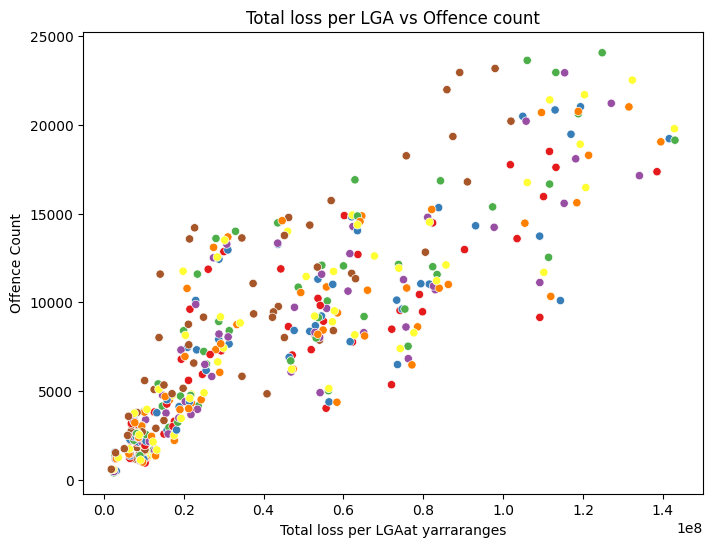

[[1.         0.85474991]
 [0.85474991 1.        ]]


In [15]:
# Plot EGM loss per person against offence rate
egm_offence_data = {
    'Year': [],
    'loss': [],
    'offence_count': [],
}

for name, group in preProcess.egm.groupby('LGA Name'):
    # Ignore melbourne, since it's an outlier (probably because melbourne and city of melbourne is not the same thing)
    if name == "melbourne":
        continue
    for year in range(2014, 2021):
        egm_offence_data['Year'].append(year)
        egm_offence_data['loss'].append(group[str(year)].sum())
        egm_offence_data['offence_count'].append(
            preProcess.offences.loc[(preProcess.offences['Year'] == year) & (preProcess.offences['Local Government Area'] == name), 'Offence Count'].sum()
        )

# Create scatter plot using Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x='loss', y='offence_count', hue='Year', palette='Set1', data=egm_offence_data, legend=False)

# Add labels and title
plt.xlabel('Total loss per LGA' + f"at {name}")
plt.ylabel('Offence Count')
plt.title('Total loss per LGA vs Offence count')

# Show the plot
plt.show()

print(np.corrcoef(egm_offence_data['loss'], egm_offence_data['offence_count']))

In [ ]:
offences[(offences["Offence Count"] > 30000) & (offences["Local Government Area"] != "total")]